In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('preprocessing_cicids2017_reduced.csv')

In [20]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Idle Std,Attack Type
0,49188,4,2,12,6,6,6.0,0,0,3.000000e+06,...,0,329,-1,1,20,0.0,0.0,0,0.0,BENIGN
1,49188,1,2,12,6,6,6.0,0,0,1.200000e+07,...,0,329,-1,1,20,0.0,0.0,0,0.0,BENIGN
2,49188,1,2,12,6,6,6.0,0,0,1.200000e+07,...,0,329,-1,1,20,0.0,0.0,0,0.0,BENIGN
3,49188,1,2,12,6,6,6.0,0,0,1.200000e+07,...,0,329,-1,1,20,0.0,0.0,0,0.0,BENIGN
4,49486,3,2,12,6,6,6.0,0,0,4.000000e+06,...,0,245,-1,1,20,0.0,0.0,0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,61374,61,1,6,6,6,6.0,6,6,1.967213e+05,...,1,288,253,0,20,0.0,0.0,0,0.0,BENIGN
2830739,61378,72,1,6,6,6,6.0,6,6,1.666667e+05,...,1,288,253,0,20,0.0,0.0,0,0.0,BENIGN
2830740,61375,75,1,6,6,6,6.0,6,6,1.600000e+05,...,1,288,253,0,20,0.0,0.0,0,0.0,BENIGN
2830741,61323,48,2,12,6,6,6.0,0,0,2.500000e+05,...,0,4719,-1,1,20,0.0,0.0,0,0.0,BENIGN


In [21]:
# prompt: df에서 10%만 샘플링

sampled_df = df.sample(frac=0.1, random_state=42)  # 10% 샘플링, random_state는 재현성을 위해 설정
sampled_df


,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Idle Std,Attack Type
746827,443,32046067,2,74,37,37,37.000000,0,0,2.309176e+00,...,0,65535,-1,1,32,0.0,0.0,0,0.0,BENIGN
946912,53,66073,4,176,44,44,44.000000,107,107,9.141404e+03,...,1,-1,-1,3,20,0.0,0.0,0,0.0,BENIGN
2216843,53,60025,1,56,56,56,56.000000,112,112,2.798834e+03,...,1,-1,-1,0,32,0.0,0.0,0,0.0,BENIGN
699389,53,47619,1,44,44,44,44.000000,213,213,5.397005e+03,...,1,-1,-1,0,32,0.0,0.0,0,0.0,BENIGN
1170268,80,99329635,6,320,302,0,53.333333,4344,0,1.199541e+02,...,1,0,235,3,20,13973.0,0.0,13973,0.0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536066,2119,45,1,0,0,0,0.000000,6,6,1.333333e+05,...,1,29200,0,0,40,0.0,0.0,0,0.0,Port Scan
2033177,49736,25913,3,0,0,0,0.000000,0,0,0.000000e+00,...,0,349,-1,0,32,0.0,0.0,0,0.0,BENIGN
1374153,443,5372447,10,351,194,0,35.100000,1448,0,9.980554e+02,...,0,29200,122,3,32,156535.0,0.0,156535,0.0,BENIGN
2672014,80,78519958,8,56,20,0,7.000000,11595,0,1.485355e+02,...,0,256,229,6,20,722.0,0.0,722,44100000.0,DDoS


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 독립 변수와 종속 변수 나누기
X = sampled_df.drop('Attack Type', axis=1)
y = sampled_df['Attack Type']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련 (랜덤 포레스트 예시)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.9987


In [23]:
# 피처 중요도 추출
feature_importances = model.feature_importances_

# 피처 중요도를 데이터프레임으로 변환하여 정렬
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 중요도 순서대로 정렬
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(importances_df)

                        Feature  Importance
7         Bwd Packet Length Max    0.126843
3   Total Length of Fwd Packets    0.077162
0              Destination Port    0.071066
4         Fwd Packet Length Max    0.054694
10               Flow Packets/s    0.047796
31       Init_Win_bytes_forward    0.041989
6        Fwd Packet Length Mean    0.041936
23                Bwd Packets/s    0.041476
12                 Flow IAT Std    0.039984
21            Fwd Header Length    0.036254
32      Init_Win_bytes_backward    0.036211
11                Flow IAT Mean    0.034573
2             Total Fwd Packets    0.032777
22            Bwd Header Length    0.030599
9                  Flow Bytes/s    0.029447
33             act_data_pkt_fwd    0.028948
27               PSH Flag Count    0.028686
34         min_seg_size_forward    0.027247
28               ACK Flag Count    0.022068
8         Bwd Packet Length Min    0.021848
1                 Flow Duration    0.021729
14                  Fwd IAT Min 

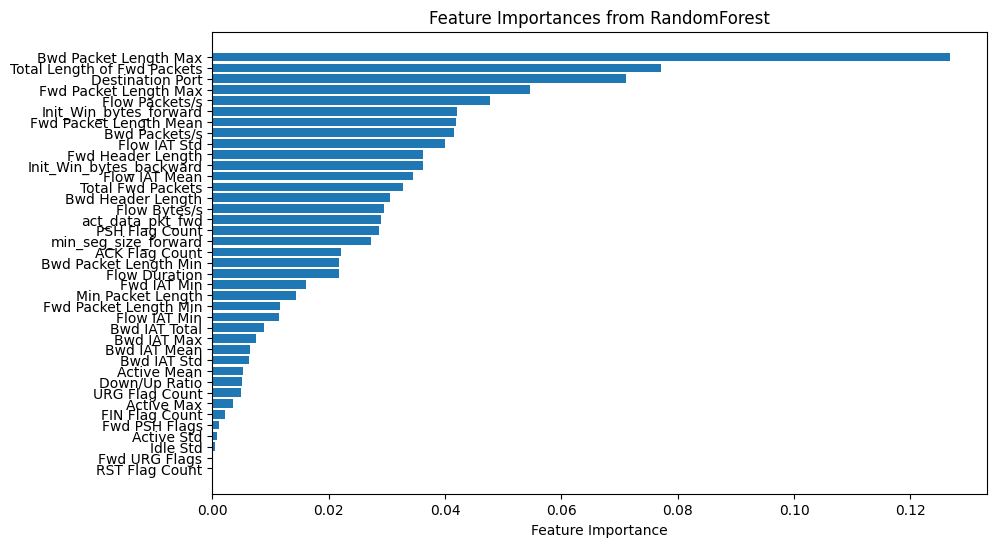

In [24]:
# 피처 중요도 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForest')
plt.show()

In [25]:
# 중요도가 0.032보다 낮은 피처 필터링
threshold = 0.032
features_to_keep = importances_df[importances_df['Importance'] >= threshold]['Feature']

# 중요도가 0.032보다 높은 피처들만 유지한 새로운 데이터프레임
X_reduced = X[features_to_keep]

# 결과 확인
print(f"제거된 피처 수: {len(X.columns) - len(features_to_keep)}")
print(f"유지된 피처들: {list(features_to_keep)}")
print(X_reduced.head())

# 종속 변수 'label'을 다시 추가하여 최종 데이터프레임 구성
df_reduced = pd.concat([X_reduced, y], axis=1)
print(df_reduced)


제거된 피처 수: 26
유지된 피처들: ['Bwd Packet Length Max', 'Total Length of Fwd Packets', 'Destination Port', 'Fwd Packet Length Max', 'Flow Packets/s', 'Init_Win_bytes_forward', 'Fwd Packet Length Mean', 'Bwd Packets/s', 'Flow IAT Std', 'Fwd Header Length', 'Init_Win_bytes_backward', 'Flow IAT Mean', 'Total Fwd Packets']
         Bwd Packet Length Max  Total Length of Fwd Packets  Destination Port  \
746827                       0                           74               443   
946912                     107                          176                53   
2216843                    112                           56                53   
699389                     213                           44                53   
1170268                   4344                          320                80   

         Fwd Packet Length Max  Flow Packets/s  Init_Win_bytes_forward  \
746827                      37        0.062410                   65535   
946912                      44      121.078201      

In [26]:
df_reduced

,Bwd Packet Length Max,Total Length of Fwd Packets,Destination Port,Fwd Packet Length Max,Flow Packets/s,Init_Win_bytes_forward,Fwd Packet Length Mean,Bwd Packets/s,Flow IAT Std,Fwd Header Length,Init_Win_bytes_backward,Flow IAT Mean,Total Fwd Packets,Attack Type
746827,0,74,443,37,6.241016e-02,65535,37.000000,0.000000,0.000000e+00,64,-1,3.200000e+07,2,BENIGN
946912,107,176,53,44,1.210782e+02,-1,44.000000,60.539101,2.316343e+04,104,-1,9.439000e+03,4,BENIGN
2216843,112,56,53,56,3.331945e+01,-1,56.000000,16.659725,0.000000e+00,32,-1,6.002500e+04,1,BENIGN
699389,213,44,53,44,4.200004e+01,-1,44.000000,21.000021,0.000000e+00,32,-1,4.761900e+04,1,BENIGN
1170268,4344,320,80,302,1.308774e-01,0,53.333333,0.070472,2.870000e+07,164,235,8.277470e+06,6,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536066,6,0,2119,0,4.444444e+04,29200,0.000000,22222.222220,0.000000e+00,40,0,4.500000e+01,1,Port Scan
2033177,0,0,49736,0,1.157720e+02,349,0.000000,0.000000,1.762605e+04,96,-1,1.295650e+04,3,BENIGN
1374153,1448,351,443,194,3.164294e+00,29200,35.100000,1.302944,1.301447e+06,328,122,3.357779e+05,10,BENIGN
2672014,11595,56,80,20,1.528274e-01,256,7.000000,0.050942,2.110000e+07,172,229,7.138178e+06,8,DDoS


In [27]:
# 독립 변수와 종속 변수 나누기
X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

df_X_reduced = df[features_to_keep]
df_X_reduced = pd.concat([df_X_reduced, y], axis=1)

df_X_reduced

,Bwd Packet Length Max,Total Length of Fwd Packets,Destination Port,Fwd Packet Length Max,Flow Packets/s,Init_Win_bytes_forward,Fwd Packet Length Mean,Bwd Packets/s,Flow IAT Std,Fwd Header Length,Init_Win_bytes_backward,Flow IAT Mean,Total Fwd Packets,Attack Type
0,0,12,49188,6,5.000000e+05,329,6.0,0.00000,0.0,40,-1,4.0,2,BENIGN
1,0,12,49188,6,2.000000e+06,329,6.0,0.00000,0.0,40,-1,1.0,2,BENIGN
2,0,12,49188,6,2.000000e+06,329,6.0,0.00000,0.0,40,-1,1.0,2,BENIGN
3,0,12,49188,6,2.000000e+06,329,6.0,0.00000,0.0,40,-1,1.0,2,BENIGN
4,0,12,49486,6,6.666667e+05,245,6.0,0.00000,0.0,40,-1,3.0,2,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,6,6,61374,6,3.278689e+04,288,6.0,16393.44262,0.0,20,253,61.0,1,BENIGN
2830739,6,6,61378,6,2.777778e+04,288,6.0,13888.88889,0.0,20,253,72.0,1,BENIGN
2830740,6,6,61375,6,2.666667e+04,288,6.0,13333.33333,0.0,20,253,75.0,1,BENIGN
2830741,0,12,61323,6,4.166667e+04,4719,6.0,0.00000,0.0,40,-1,48.0,2,BENIGN


In [28]:
df_X_reduced.to_csv('preprocessing_feature_important_reduced.csv', index=False)